# 라이브러리를 import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# mnist 데이터 불러오기

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, y_train = x_train / 255.0, y_train / 255.0
print(type(x_train))
print(type(y_train))

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


정답 label : 0.0196078431372549


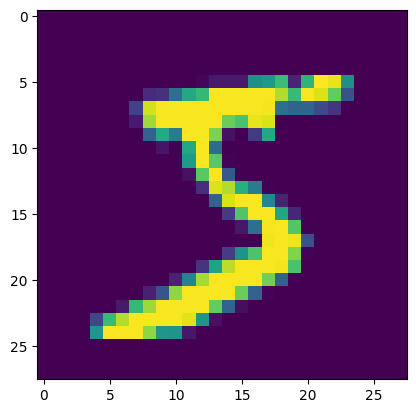

In [4]:
plt.imshow(x_train[0])
print('정답 label :', y_train[0])

# ANN 모델 정의

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 손실함수 및 옵티마이저 정의

In [6]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ANN 모델 학습

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.0178 - accuracy: 0.0984
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 7.9533e-04 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 4.5395e-04 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.1763e-04 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4406e-04 - accuracy: 0.0987


# 학습된 ANN 모델 평가

In [8]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 3413.8911 - accuracy: 0.0980 - 685ms/epoch - 2ms/step


[3413.89111328125, 0.09799999743700027]

# 학습된 ANN 모델 예측

1/1 [==============================] - 0s 91ms/step
예측값 : 0
정답 : 6


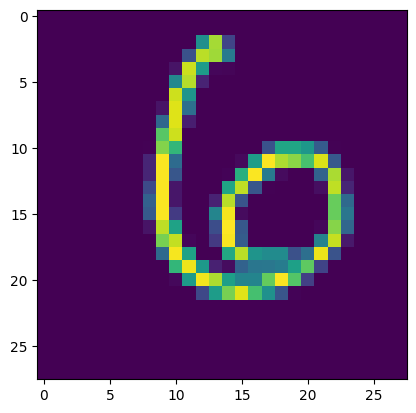

In [9]:
plt.imshow(x_test[100])
predictions = model.predict(x_test[100:101])
print('예측값 :', np.argmax(predictions[0]))
print('정답 :', y_test[100])